In [274]:
import pandas as pd
import numpy as np
from imp import reload
import taxonomy
reload(taxonomy)
from taxonomy import Node, Taxonomy

In [263]:
taxonomy_file = '/Users/jiji/Downloads/CC_Taxonomy.xlsx'
df = pd.read_excel(taxonomy_file)
df.to_csv('CC_Taxonomy.csv',index=False, header=False)
taxonomy_file = '/Users/jiji/Desktop/Final/CC_Taxonomy.csv'

papers_file = '/Users/jiji/Desktop/Final/papers.csv'

In [269]:
ds_taxonomy = Taxonomy(taxonomy_file)
topics = [leaf.name for leaf in ds_taxonomy.root.leaf_cluster]

papers = pd.read_csv(papers_file)
abstracts = list(papers['abstract'])

In [286]:
import relevance_matrices
reload(relevance_matrices)
from relevance_matrices import text_to_topic, topic_to_topic

In [287]:
# R = text_to_topic(abstracts, topics)
# np.savetxt("R.txt", R)
R_path='/Users/jiji/Desktop/Final/R.txt'
R = np.loadtxt(R_path)

In [442]:
R.shape

(461, 106)

In [548]:
A = topic_to_topic(R, threshold=0.2)

In [549]:
import lapin
import faddis
reload(lapin); reload(faddis)
from lapin import lapin
from faddis import faddis

In [550]:
lapin_A = lapin(A)
u_matrix = faddis(lapin_A)
np.savetxt('U_matrix.txt', u_matrix)

Cluster contribution is too small


In [551]:
print(u_matrix.shape)
n_clusters = u_matrix.shape[1]
print('Number of extracted clusters:', n_clusters)

(106, 12)
Number of extracted clusters: 12


In [552]:
import ParGen
reload(ParGen)
from ParGen import parGen

In [569]:
ds_taxonomy = Taxonomy(taxonomy_file)
k=0
LIMIT = 0.03
GAMMA = 0.9
LAMBDA = .1
u_vec = u_matrix[:,k]
parGen(ds_taxonomy.root, u_vec, gamma_v=GAMMA, lambda_v=LAMBDA, limit=LIMIT)

SUM: 1.0000000000000004
Number of leaves: 106
All positive weights:
Anomaly detection                                            0.92
Fuzzy clustering                                             0.33
Other clustering                                             0.11
Linear regression                                            0.09
One cluster                                                  0.06
Belief network                                               0.06
Community detection                                          0.05
Tree                                                         0.05
Truncating with u-membership threshold 0.03
Setting weights for internal nodes
Membership in root: 1.00000
Pruning tree...
Number of leaves after truncating and pruning 80
Setting gaps...and other parameters
ParGenFS main steps...
Saving...
Table saved in the file: table.csv
ete representation saved in the file: taxonomy_tree_lifted.ete
Done.


In [570]:
import visualize
reload(visualize)
from visualize import draw_lifting_tree_inline

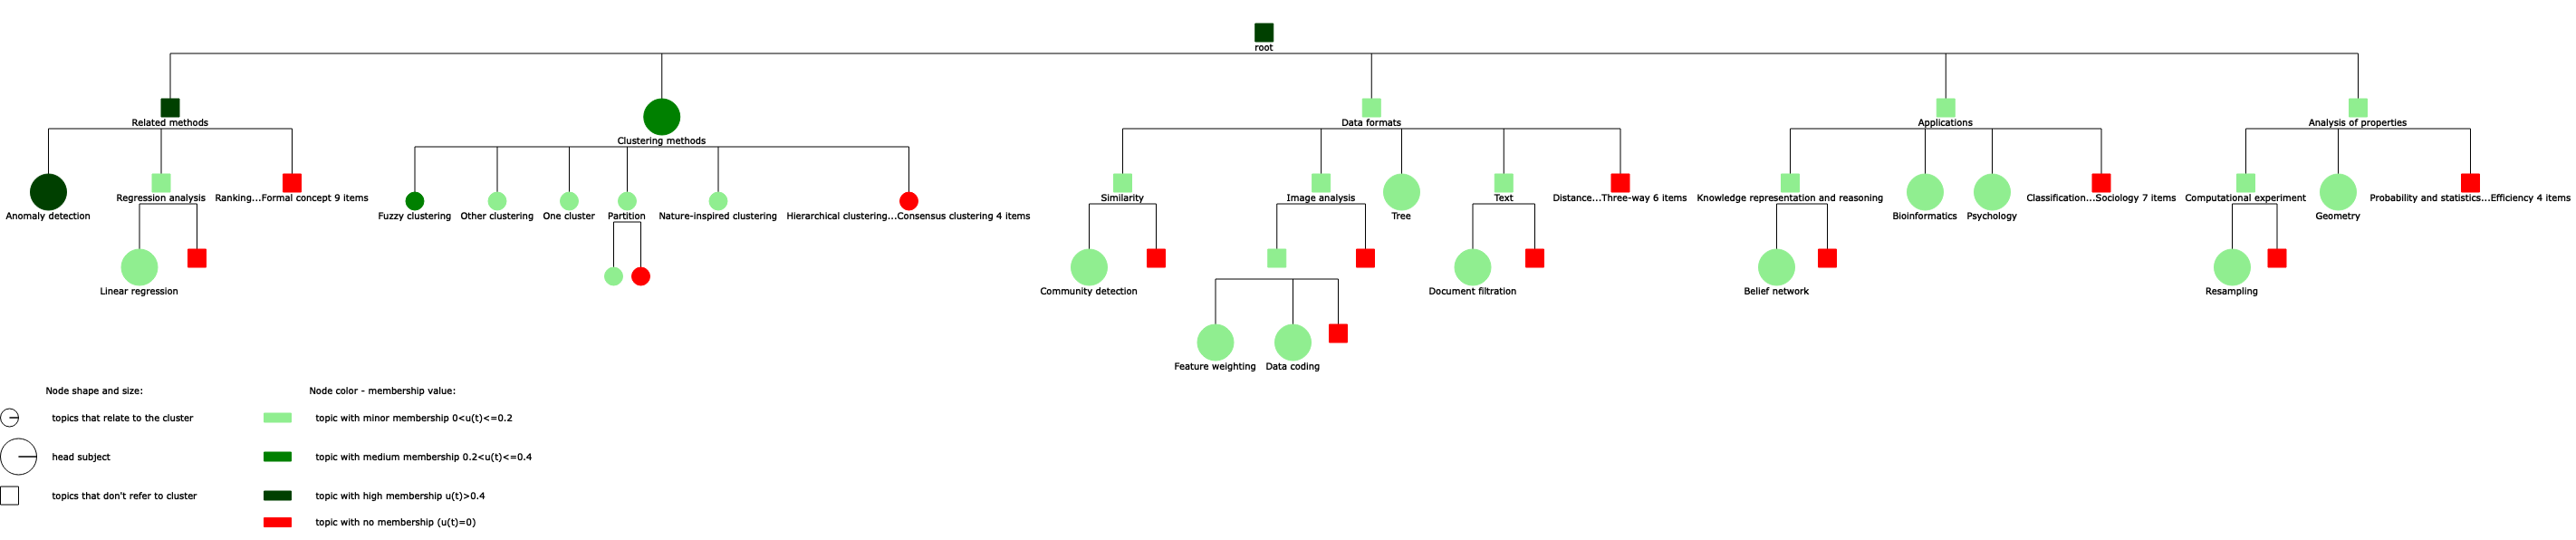

In [571]:
draw_lifting_tree_inline('taxonomy_tree_lifted.ete')